In [1]:
import pandas as pd

# Contoh membaca dataset CSV
data = pd.read_csv("diabetes.csv")

# Melihat informasi dataset
print(data.info())

# Melihat statistik deskriptif data
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [3]:
# Variabel independen (X) dan dependen (y)
X = data.drop(columns=["Outcome"])  # Ganti "Outcome" dengan nama kolom target Anda
y = data["Outcome"]


In [5]:
# Memeriksa nilai kosong
print(data.isnull().sum())

# Mengisi nilai kosong dengan mean
data.fillna(data.mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
from scipy.stats import zscore

# Menghitung Z-score
z_scores = zscore(X)

# Menyaring data yang tidak termasuk outlier (Z-score < 3)
X_cleaned = X[(z_scores < 3).all(axis=1)]
y_cleaned = y[(z_scores < 3).all(axis=1)]


In [9]:
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)


In [11]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Buat model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


Koefisien: [ 0.06237112  0.17799984 -0.05035682  0.01069109 -0.03321257  0.10055293
  0.0647642   0.04882993]
Intercept: 0.341502018298214


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi data pengujian
y_pred = model.predict(X_test)

# Hitung MSE dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.13863543444757997
R-squared (R²): 0.34154346687062953


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Transformasi polinomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Latih ulang model
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)


LinearRegression()

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Ubah nilai alpha untuk mengatur kekuatan regularisasi
ridge.fit(X_train, y_train)


Ridge()

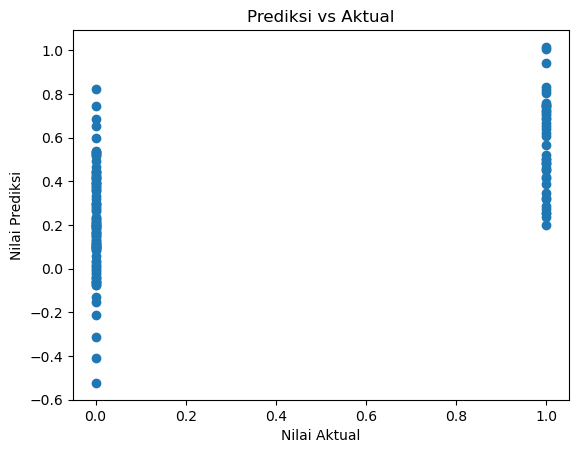

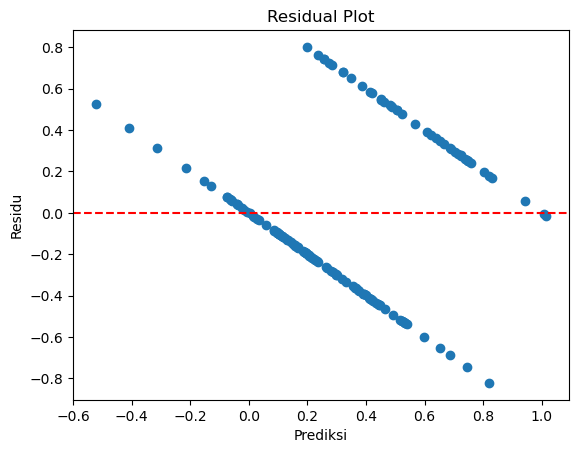

In [23]:
import matplotlib.pyplot as plt

# Visualisasi Prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Aktual")
plt.show()

# Visualisasi Residu
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residu")
plt.show()
